# Adham Desouky
### Task 1 : EDA - Retail 
#### Finidng out the weak areas for improvement to make more profit 

### Importing Necessary Libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from fpdf import FPDF

### Data Loading

In [2]:
df = pd.read_csv('SampleSuperstore.csv')

### Data Exploring

In [3]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
# Summary statistics
summary_stats = df.describe()
summary_stats

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [5]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [6]:
# Check data types
data_types = df.dtypes
data_types

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

In [7]:
# Check for duplicates and remove them
df.drop_duplicates(inplace=True)

### Setting Main Style

In [8]:
# Set the style
sns.set_style('whitegrid')
sns.set_palette('viridis')

### Sales and Profit Analysis

#### *Heatmap of Sales by Category and Sub-Category*

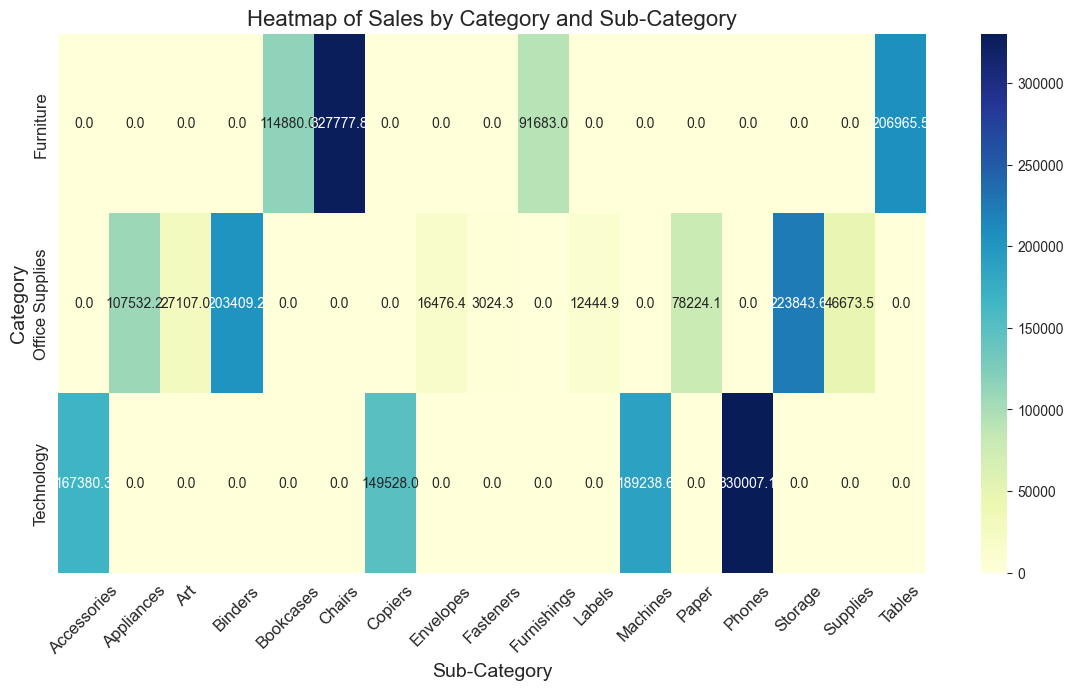

In [9]:
heatmap_data = df.pivot_table(values='Sales', index='Category', columns='Sub-Category', aggfunc='sum', fill_value=0)
plt.figure(figsize=(14, 7))
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title('Heatmap of Sales by Category and Sub-Category', fontsize=16)
plt.xlabel('Sub-Category', fontsize=14)
plt.ylabel('Category', fontsize=14)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.savefig('heatmap_category_subcategory.png')
plt.show()
plt.close()

#### *Box plot of Sales by Region*

C:\Users\adham\AppData\Local\Temp\ipykernel_29012\1315089706.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Region', y='Sales', data=df, palette='coolwarm')


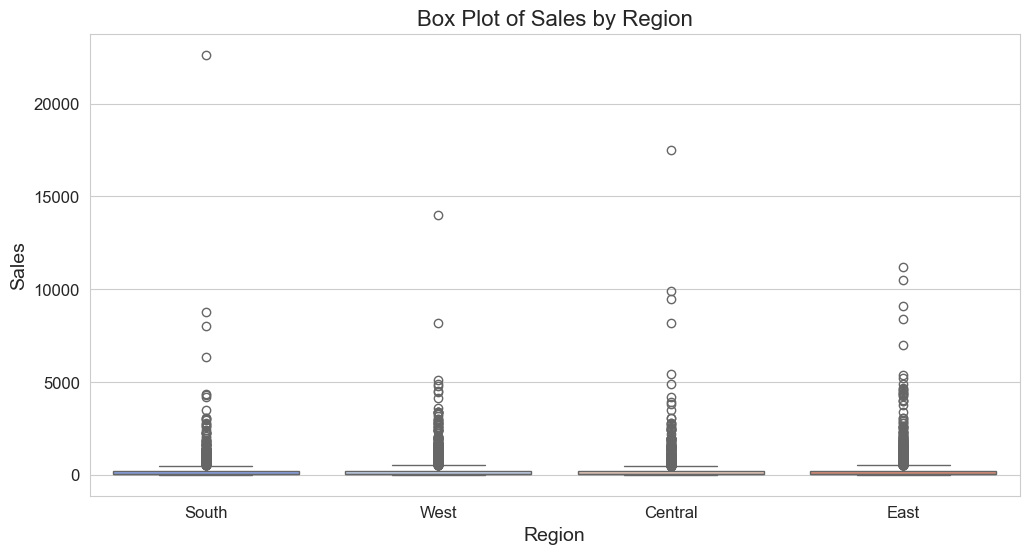

In [10]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Region', y='Sales', data=df, palette='coolwarm')
plt.title('Box Plot of Sales by Region', fontsize=16)
plt.xlabel('Region', fontsize=14)
plt.ylabel('Sales', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig('boxplot_sales_region.png')
plt.show()
plt.close()

#### *Scatter plot of Sales vs. Profit*

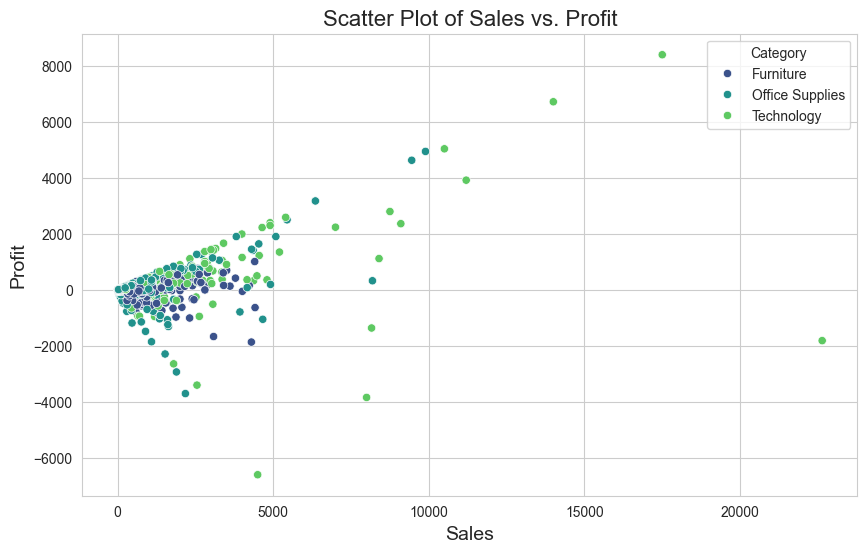

In [11]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Sales', y='Profit', hue='Category', data=df, palette='viridis')
plt.title('Scatter Plot of Sales vs. Profit', fontsize=16)
plt.xlabel('Sales', fontsize=14)
plt.ylabel('Profit', fontsize=14)
plt.legend(title='Category')
plt.savefig('scatter_sales_profit.png')
plt.show()
plt.close()

#### *Pie chart of Sales by Category*

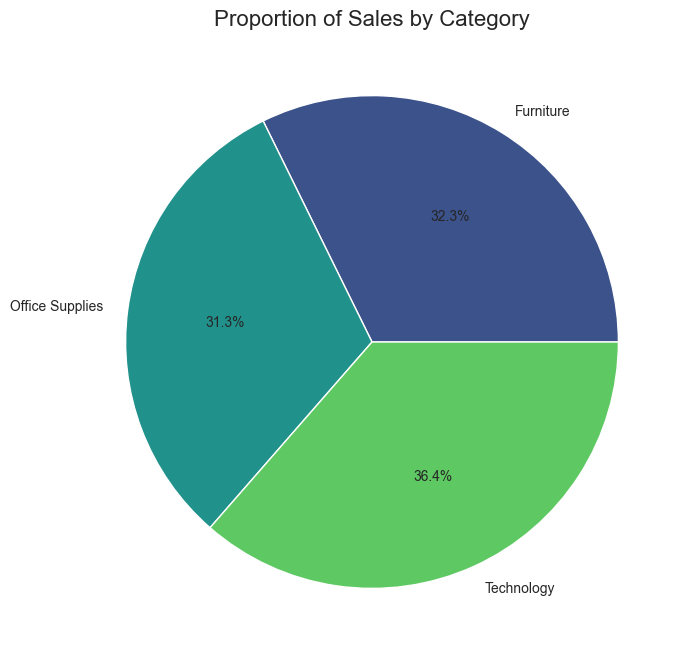

In [12]:
category_sales = df.groupby('Category')['Sales'].sum()
plt.figure(figsize=(8, 8))
plt.pie(category_sales, labels=category_sales.index, autopct='%1.1f%%', colors=sns.color_palette('viridis', len(category_sales)))
plt.title('Proportion of Sales by Category', fontsize=16)
plt.savefig('piechart_sales_category.png')
plt.show()
plt.close()

### *Regional Analysis*

C:\Users\adham\AppData\Local\Temp\ipykernel_29012\542019166.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Region', y='Sales', data=region_sales, palette='coolwarm')


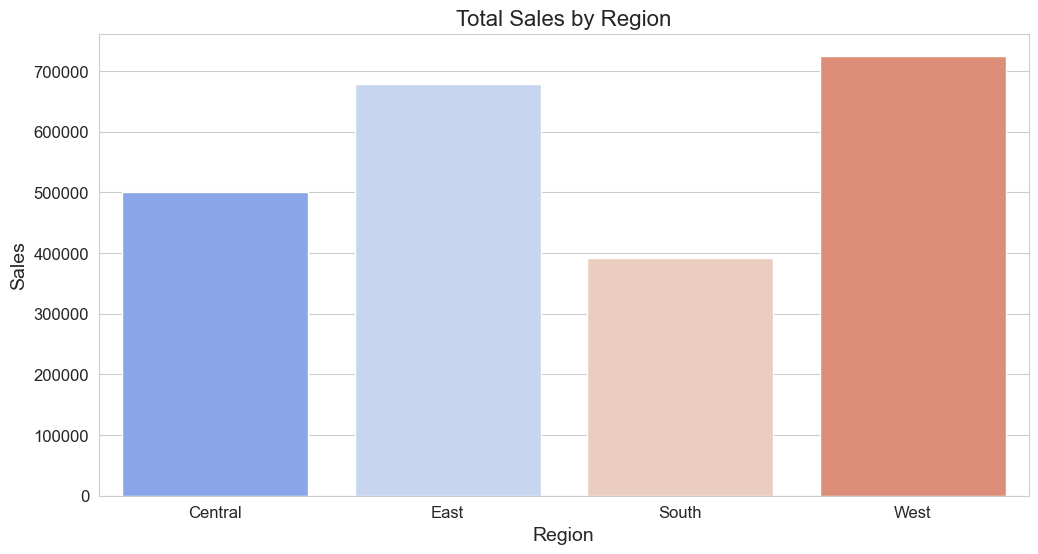

In [13]:
# Sales by Region
region_sales = df.groupby('Region')['Sales'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='Region', y='Sales', data=region_sales, palette='coolwarm')
plt.title('Total Sales by Region', fontsize=16)
plt.xlabel('Region', fontsize=14)
plt.ylabel('Sales', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig('region_sales.png')
plt.show()
plt.close()

C:\Users\adham\AppData\Local\Temp\ipykernel_29012\2226050870.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Region', y='Profit', data=region_profit, palette='coolwarm')


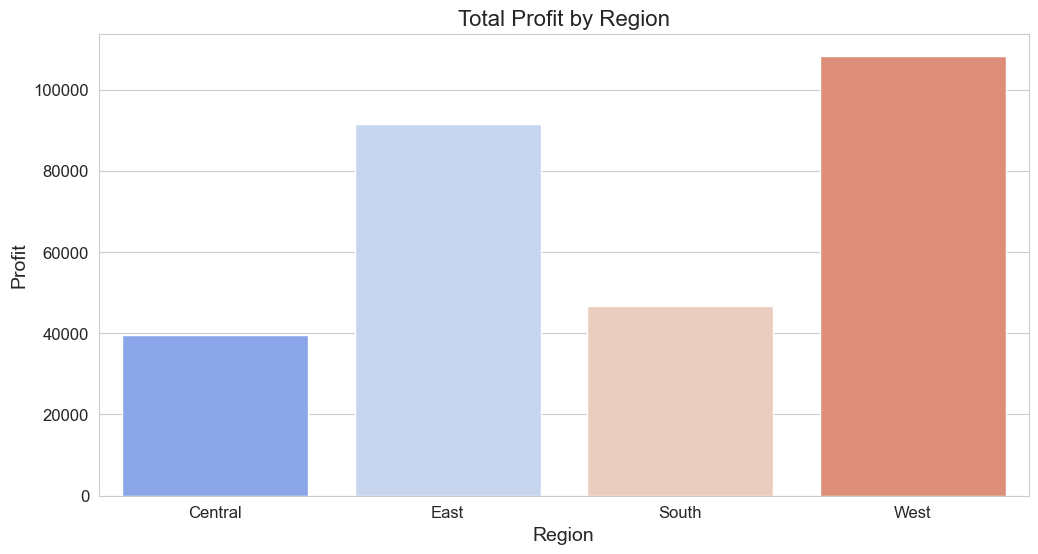

In [14]:
# Profit by Region
region_profit = df.groupby('Region')['Profit'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='Region', y='Profit', data=region_profit, palette='coolwarm')
plt.title('Total Profit by Region', fontsize=16)
plt.xlabel('Region', fontsize=14)
plt.ylabel('Profit', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig('region_profit.png')
plt.show()
plt.close()

### *Export to PDF*

In [18]:
class EnhancedPDF(FPDF):
    def __init__(self):
        super().__init__()
        self.set_margins(20, 15)  # Adjust margins for better layout
        self.set_auto_page_break(True, 15)  # Prevent text from overflowing to next page

    def footer(self):
        self.set_y(-15)
        self.set_font('Arial', 'I', 8)
        self.cell(0, 10, f'Page {self.page_no()}', 0, 0, 'C')

    def chapter_title(self, chapter_title):
        self.set_font('Arial', 'B', 12)
        self.cell(0, 10, chapter_title.upper(), 0, 1, 'L')  # Capitalize chapter titles
        self.ln(5)

    def chapter_body(self, body):
        self.set_font('Arial', '', 10)  # Reduce body text size for better reading experience
        self.multi_cell(0, 5, body)  # Adjust line height for spacing
        self.ln(5)  # Add space after each paragraph

    def add_image(self, image_path, width=150):
        self.image(image_path, x=20, w=width)  # Adjust image position and width
        self.ln(8)  # Add space after images

# Create PDF
pdf = EnhancedPDF()
pdf.add_page()

# Add introduction
pdf.chapter_title('Exploratory Data Analysis Report - Retail')
pdf.chapter_title('Introduction')
intro_text = (
    "This report provides an exploratory data analysis (EDA) of the Sample Superstore dataset. "
    "The analysis includes sales and profit insights by category and region. This report aims to help business owners "
    "identify weak areas and opportunities for increasing profit."
)
pdf.chapter_body(intro_text)

# Table of Contents
pdf.chapter_title('Table of Contents')
toc = (
    "1. Introduction\n"
    "2. Heatmap of Sales by Category and Sub-Category\n"
    "3. Scatter Plot of Sales vs. Profit\n"
    "4. Box Plot of Sales by Region\n"
    "5. Pie Chart of Sales by Category\n"
    "6. Conclusion\n"
    "7. Appendix"
)
pdf.chapter_body(toc)

# Add Heatmap of Sales by Category and Sub-Category
pdf.chapter_title('Heatmap of Sales by Category and Sub-Category')
pdf.add_image('heatmap_category_subcategory.png')

# Add Scatter Plot of Sales vs. Profit
pdf.chapter_title('Scatter Plot of Sales vs. Profit')
pdf.add_image('scatter_sales_profit.png')

# Add Box Plot of Sales by Region
pdf.chapter_title('Box Plot of Sales by Region')
pdf.add_image('boxplot_sales_region.png')

# Add Pie Chart of Sales by Category
pdf.chapter_title('Pie Chart of Sales by Category')
pdf.add_image('piechart_sales_category.png')

# Add Conclusion
pdf.chapter_title('Conclusion')
conclusion_text = (
    "Recommendations:\n"
    "- Consider focusing on categories and regions with high profits.\n"
    "- Investigate categories and regions with low or negative profits to identify and mitigate issues."
)
pdf.chapter_body(conclusion_text)

# Add Appendix
pdf.chapter_title('Appendix')
appendix_text = (
    "This section provides detailed data summaries and additional insights.\n\n"
    f"Summary Statistics:\n{summary_stats}\n\n"
    f"Missing Values:\n{missing_values}\n\n"
    f"Data Types:\n{data_types}\n"
)
pdf.chapter_body(appendix_text)

# Save the PDF
pdf_output_path = 'EDA_Retail.pdf'
pdf.output(pdf_output_path)

print(f'Report saved to {pdf_output_path}')

Report saved to EDA_Retail.pdf
